# Agenda
 

- PART-I:
    
    - What is data exploration?
    - Why data exploration is important?
    - Questions to answer with EDA 

- PART-II:

    - Using Pandas for exploratory data analysis
    - Using visualization libraries for exploratory data analysis

- PART-III:

    - Exploratory data analysis with housing data.

# PART-I

## What is data exploration?


> "Exploratory data analysis is a detective work: Numerical detective work or counting detective work or graphical detective work." John Tukey

__Exploratory Data Analysis__ (EDA) is an approach for data analysis to:

- Gain insight,

- Detect Anomalies,

- Understand variables and their relations,

- Inspect more informative features,

- Check/test assumptions.



## Why is EDA is important?

"To get a "feel" for the data, it is not enough for the analyst to know what is in the data; the analyst also must know what is not in the data, and the only way to do that is to draw on our own human pattern-recognition and comparative abilities in the context of a series of judicious graphical techniques applied to the data."" 

[Source](https://www.itl.nist.gov/div898/handbook/eda/section1/eda14.htm)


## Questions to Answer


1. What is a typical value?

2. What is a good distributional fit for a set of numbers?

3. What are the most important factors?

4. Is the measurements from different categories are equivalent?

5. Does the data have outliers?

[For a bigger list of questions and more details](https://www.itl.nist.gov/div898/handbook/eda/section3/eda32.htm)

## Steps of EDA





__Variable Identification__

- Identify input features (independent features, inputs) and target features (dependent features, outputs)

- Check whether any input feature is exact copy of the output feature or not.

- Check the data types of the input and output. 

- Check whether the variables are categorical, ordinal or continuous.


__Univariate Analysis__

Focus on individual variables. Possible techniques: 

- Mean, Median, Mode, variance, box-plots, histograms, range, counts, bar plots etc.

__Bivariate Analysis__

Focus on relations between two variables. Possible techniques:

- Scatter plots, heatmaps, [correlation statistics](https://en.wikipedia.org/wiki/Correlation_and_dependence#Rank_correlation_coefficients), Chi-square tests, stacked column plots etc.

__Missing Value Treatment__

Possible Techniques

- Deletion

- Mean-Median-Mode Imputation

- Prediction

- Similarity Based imputations


__Outlier Treatment__

An outlier is a data point that differs significantly from other observations. 

- Model based  methods to detect outliers

- Graph-based methods for detecting outliers.

- Hybrid methods

__Variable Transformation__

Possible situations where variable transformation might be needed:

- Change of scale
- Converting non-linear relationship to linear one. 
- Changing the distribution


__Possible methods for variable transformation__

- Applying a certain function (logarithm, square root, exponential etc.)

- Binning

- Hand made modifications

- Creating dummy-variables



## Resources

[NIST: Exploratory Data Analysis](https://www.itl.nist.gov/div898/handbook/eda/eda.htm)
[Tukey - Exploratory Data Analysis](http://www.ru.ac.bd/wp-content/uploads/sites/25/2019/03/102_05_01_Tukey-Exploratory-Data-Analysis-1977.pdf)

[IBM - Exploratory Data Analysis](https://www.ibm.com/cloud/learn/exploratory-data-analysis)

[Analytics Vidhya - Data Exploration](https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/)

[Omnisci -EDA](https://www.omnisci.com/learn/data-exploration)

# Part-II

## Loading Data

In [1]:
import requests # for loading data from an online resource
from io import StringIO # for reading inputs
import pandas as pd # for manipulating data


[Baseball  Hitters Dataset - Kaggle](https://www.kaggle.com/floser/hitters)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS601_Fall21/main/Week05/data/Hitters.csv', index_col= 0).reset_index()

In [3]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


## Variable Identification

In [4]:
## we can check object types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

Target Variable: Salary

Input variables: AtBats, Hits, Years, ...

In [5]:
df.Salary.isnull().sum()

59

## Univariate Analysis

__Descriptive Statistics__

In [6]:
## pandas has a vey handy method to return for descriptive stats

df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [7]:
df[df.Hits == 1]

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
217,20,1,0,0,0,0,2,41,9,2,6,7,4,N,E,78,220,6,2127.333,N


Let's choose a variable, say `Hits` and examine it.

__Histograms__

In [8]:
## Histograms are very useful tools to understand the distribution of a variable
import matplotlib.pyplot as plt
import seaborn as sns

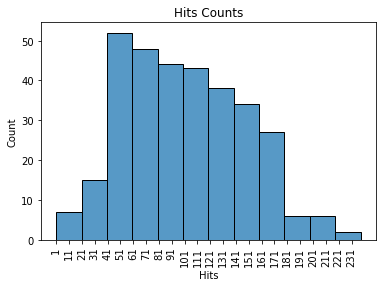

In [9]:
## let's use seaborns histplot method for creating a histogram for Hits
sns.histplot(data= df.Hits)
plt.xticks(range(df.Hits.min(), df.Hits.max(), 10), rotation= 90)
plt.title('Hits Counts')
plt.show()

In [10]:
df[df.Hits < 10]

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
52,19,7,0,1,2,1,4,41,13,1,3,4,4,A,E,0,0,0,NaN,A
64,24,3,0,1,0,2,3,159,28,0,20,12,9,A,W,80,4,0,NaN,A
217,20,1,0,0,0,0,2,41,9,2,6,7,4,N,E,78,220,6,2127.333,N
250,33,6,0,2,4,7,1,33,6,0,2,4,7,A,W,205,5,4,NaN,A
283,16,2,0,1,0,0,2,28,4,0,1,0,0,A,E,247,4,8,NaN,A
295,19,4,1,2,3,1,1,19,4,1,2,3,1,N,W,692,70,8,920.000,A


In [11]:
df[(df.Hits > 21) & (df.Hits < 31)]

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
261,126,27,3,8,10,5,4,239,49,3,16,13,14,N,E,190,2,9,190.0,N


In [ ]:
## Let's investigate histogram more

In [12]:
## Also note that pandas series has an quantile method


df.Hits.quantile((0.01, 0.03))

0.01     4.42
0.03    32.00
Name: Hits, dtype: float64

In [13]:
9/322

0.027950310559006212

In [14]:
sorted(df.Hits.values)

[1,
 2,
 3,
 4,
 6,
 7,
 10,
 27,
 31,
 32,
 32,
 34,
 36,
 37,
 37,
 37,
 39,
 39,
 39,
 39,
 40,
 40,
 41,
 41,
 41,
 42,
 43,
 43,
 43,
 43,
 44,
 44,
 45,
 46,
 46,
 46,
 46,
 47,
 47,
 47,
 49,
 49,
 51,
 51,
 52,
 52,
 52,
 53,
 53,
 53,
 53,
 53,
 53,
 54,
 54,
 54,
 54,
 54,
 55,
 55,
 56,
 56,
 56,
 56,
 57,
 57,
 57,
 58,
 58,
 59,
 59,
 60,
 60,
 60,
 61,
 61,
 61,
 61,
 63,
 63,
 64,
 64,
 65,
 66,
 66,
 66,
 68,
 68,
 68,
 68,
 68,
 69,
 69,
 69,
 69,
 70,
 70,
 70,
 70,
 70,
 70,
 71,
 71,
 72,
 73,
 73,
 73,
 74,
 75,
 76,
 76,
 76,
 76,
 76,
 76,
 77,
 77,
 77,
 77,
 78,
 78,
 78,
 80,
 80,
 81,
 81,
 81,
 81,
 82,
 82,
 83,
 83,
 83,
 84,
 84,
 84,
 84,
 84,
 85,
 85,
 86,
 86,
 87,
 88,
 90,
 91,
 91,
 92,
 92,
 92,
 92,
 93,
 93,
 93,
 94,
 94,
 94,
 95,
 95,
 96,
 96,
 96,
 96,
 97,
 98,
 99,
 100,
 101,
 101,
 101,
 101,
 101,
 102,
 102,
 103,
 103,
 103,
 103,
 103,
 104,
 104,
 106,
 106,
 108,
 108,
 109,
 110,
 110,
 110,
 112,
 112,
 113,
 113,
 113,
 113,
 1

__Box Plots__

[Box Plots Explained](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

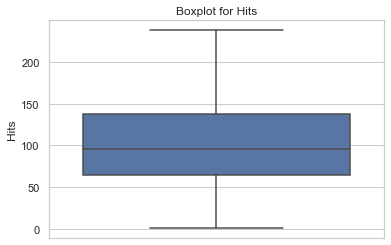

In [15]:
## another very useful visual method is boxplots. 
## By default they also try to get outliers.

sns.set_theme(style="whitegrid")
sns.boxplot(y = df.Hits)
plt.title('Boxplot for Hits')
plt.show()
## seaborn has a very easy to use method `boxplot` for creating boxplots

__Violin Plots__

[Violin Plots Explained](https://towardsdatascience.com/violin-plots-explained-fb1d115e023d)

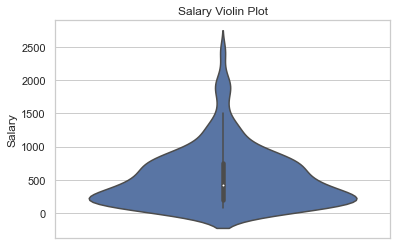

In [16]:
sns.set_theme(style="whitegrid")
## Note that even if boxplots tell us median and min-max 
## they don't give whole distribution.

## seaborn has a handy method `violinplot` to create such plots


sns.violinplot(y = df.Salary)

plt.title('Salary Violin Plot')
plt.show()

__Working with categorical variables__

In [17]:
## note that if we are working with categorical variables 

## histplots are very straightforward.

df.League.value_counts()

A    175
N    147
Name: League, dtype: int64

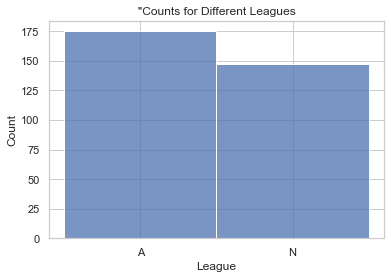

In [18]:
sns.histplot(x = df.League)
plt.title('"Counts for Different Leagues')
plt.show()

## Bivariate Analysis

Continuous variable vs Continuous variable

In [19]:
## scatterplots are one of the most popular and useful methods 
## to see the relationship between two variables

## Let's check Walks vs RBI's

<AxesSubplot:xlabel='AtBat', ylabel='RBI'>

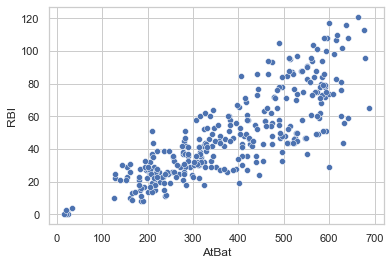

In [20]:
sns.scatterplot(x = df.AtBat, y = df.RBI)

Categorical variable vs Continuous variable

In [21]:
## sometimes we might want to compare a categorical variable wrt a continuous one.

## seaborn has a `catplot` method for this kind of plots.

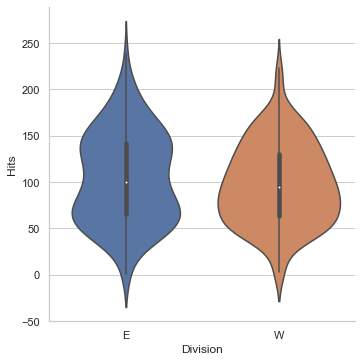

In [22]:
sns.catplot(y = 'Hits', x = 'Division', data = df, kind = 'violin')

# PART-III

## Lab

This part of the notebook is inspired by [Hands on Machine Learning with Scikit-Learn & TensorFlow- ch2](https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb)


Use the EDA techniques we learned above to get better insight about the California Housing dataset.


# Readings before working on your midterm

From [R for data science book](https://r4ds.had.co.nz/exploratory-data-analysis.html) read chapter-7. (skip all the coding parts.)

Some of the questions you can ask to yourself as you are reading are:

From 7.1:

- What are the steps of EDA cycle?
- What is EDA?
- Tools of EDA?

From 7.2:

- What is the key to generating good questions?
- What are the two types of questions that might be helpful to make discoveries within your data?
- Definitions: Variable, variation, value, observation, etc.

From 7.3:

- When you can get variation?
- Why do you think even constant quantities might have variation when they are measured multiple times?
- What is a categorical variable?
- What is a continuous variable?
- What are the ways to visualize categorical and continuous variables?
- How do you identify `typical values` in a categorical and numerical values?
- What are the outliers?

From 7.4:

- What are the two ways of dealing with unusual values?

From 7.5:

- What is covariation?

- Explain density, box plot and IQR